# AQI Computation for the year 2009 

In [1]:
# importing required packages
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt

In [13]:
# importing the dataset
df = pd.read_excel(r'C:\Users\Admin\Desktop\PROJECT\FYP\Air-Quality-Index-Analysis\date_data.xlsx',parse_dates=['date'])
df.head()

,date,so2,no2,rspm,spm
0,2008-01-01,4.000000,36.500000,131.000000,388.000000
1,2008-01-02,4.948598,47.769626,249.912281,464.264151
2,2008-01-03,4.948598,47.769626,249.912281,464.264151
3,2008-01-04,4.000000,40.700000,164.000000,458.000000
4,2008-01-05,4.948598,47.769626,249.912281,464.264151


In [3]:
Date=df.iloc[732]['date']

In [4]:
# extracting the data for the year 2009
df_2009 = pd.DataFrame(df.iloc[366:731])

In [5]:
df_2009.tail()

,date,so2,no2,rspm,spm
726,2009-12-27,4.948598,47.769626,249.912281,464.264151
727,2009-12-28,4.948598,47.769626,249.912281,464.264151
728,2009-12-29,4.948598,47.769626,249.912281,464.264151
729,2009-12-30,4.948598,47.769626,249.912281,464.264151
730,2009-12-31,4.948598,47.769626,249.912281,464.264151


### Calculating the weight ratio for each pollutant

In [6]:
w = [5,43,133,201]  #these values are taken as per the Indian standards
w_sum = 0
for i in range(0,len(w)):
    w_sum += w[i]
print(w_sum)

382


In [7]:
w_ratio = []
for i in range(len(w)):
    x = float(w[i])/float(w_sum)
    w_ratio.append(x)
print(w_ratio)

[0.013089005235602094, 0.112565445026178, 0.3481675392670157, 0.5261780104712042]


### Evaluating AQI for each day in the year 2009

In [8]:
s = [50,40,60,40] 
list_aqi = []
C = []

for index,row in df_2009.iterrows():
    # concentration (mean/median) for each pollutant
    C = [ row['so2'], row['no2'], row['spm'], row['rspm'] ]
    
    # calculating pollution index
    q = []
    for i in range(0,4):
        z = s[i]*C[i]/100
        q.append(z)
    
    #AQI calculation
    aqi = 0
    for i in range(0,4):
        aqi += q[i]*w_ratio[i]
    
    list_aqi.append(aqi)

# loading the calculated AQI in the dataframe
df_2009['aqi'] = np.array(list_aqi)

In [9]:
df_2009.head()

,date,so2,no2,rspm,spm,aqi
366,2009-01-01,4.948598,47.769626,249.912281,464.264151,151.767633
367,2009-01-02,7.300000,52.000000,249.912281,665.000000,193.907323
368,2009-01-03,4.948598,47.769626,249.912281,464.264151,151.767633
369,2009-01-04,4.948598,47.769626,249.912281,464.264151,151.767633
370,2009-01-05,4.948598,47.769626,249.912281,464.264151,151.767633


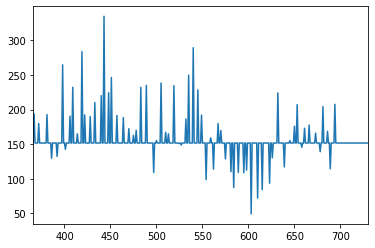

In [10]:
# plot of everday AQI
df_2009['aqi'].plot()
plt.xlabel('Days in 2009')

plt.show()

In [11]:
# exporting the calculated AQI to excel
df_2009.to_excel('aqi09_data.xlsx')